<a href="https://colab.research.google.com/github/leonardo-91/sistemas-inteligentes/blob/main/Proyecto_Final_Sistemas_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pontifica Universidad Javeriana**

Sistemas Inteligentes


---



**Grupo:**

1.   Edison Leonardo Neira Espitia
2.   Sergio Rairan
3.   Sebastian Herrara




---





# **Sistema inteligente para la segmentación de clientes con el fin de potencializar y optimizar la conversión de la campaña deposito financiero**



---



# **Contexto**

Una institución bancaria portuguesa, propone a través de una campaña de marketing basada en llamadas telefónica, predecir si un usuario se suscribirá a un depósito a plazos. De cada usuario intentan saber atributos como el trabajo actual, el nivel de educación, el incumplimiento financiero, etc. Actualmente, la institución realiza las llamadas sin clasificar ni priorizar clientes, como consecuencia se tiene un tiempo elevado en la labor e incomodidad en clientes que no cumplan con el perfil.



## **Objetivo**

Aumentar el número de clientes que se suscriben y al mismo tiempo eficientar la operación de la campaña de depósito financiero (CDT) a partir de estrategias orientadas a la conversión de usuarios usando cuatro técnicas de IA utilizando datos de los años 2012 - 2014 con un nivel mínimo de precisión del 80% de conversión, buscando ampliar el recaudo financiero para la compañía (Banco), posibilitando el aumento del índice de inversión y por ende el aumento de las utilidades. Esperamos analizar estos cuatro tipos de técnicas de IA por medio de Google Colabs usando Python 3.7 como leguaje de programación, y Scikit-Learn como librería de apoyo para la implementación de los diferentes algoritmos, a su vez usaremos el set de datos públicos de una institución financiera de Portugal que se encuentra alojado en Center of Machine Learning  and Intellignet system (UCI), tenemos como objetivo desarrollar este análisis en el transcurso del curso que se estima será de 3 meses.  



---



## **Desarrollo**

In [1]:
!python --version

Python 3.7.12


Instalamos libreria para tratar el desbalanceo de datos

In [2]:
#!pip install imbalanced-learn

In [3]:
#!pip install -U scikit-learn

**Librerias**

In [4]:
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

**Matriz de confusion**

In [5]:
def list_cm(cm,classes):     #función para generar de una forma más visual la matriz de confusión
    if len(cm)==2:
      cm.astype(int)
      row_0 =['','Valor','Verdadero']
      row_1 =['-',classes[0],classes[1]]
      row_2 =[classes[0],cm[0,0],cm[1,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1]]
      table = zip(row_0,row_1, row_2, row_3)
      headers = ['', '', 'Valor', 'Predicho']  
      return print(tabulate(table, headers=headers, floatfmt=".0f"))
    else:
      cm.astype(int)
      row_0 =['','Valor','Verdadero','']
      row_1 =['-',classes[0],classes[1],classes[2]]
      row_2 =[classes[0],cm[0,0],cm[1,0],cm[2,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1],cm[2,1]]
      row_4 =[classes[2],cm[0,2],cm[1,2],cm[2,2]]
      table = zip(row_0,row_1, row_2, row_3, row_4)
      headers = ['', '', 'Valor', 'Predicho', '']  
      return print(tabulate(table, headers=headers, floatfmt=".0f")) 

**Cargue de datos**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Ruta leo : "/content/drive/MyDrive/Maestria IA/Sistemas Inteligentes/Proyecto Final SI/Set de datos/bank-full.csv"
#Ruta Sergio : "/content/drive/MyDrive/Proyecto Final/Set de datos/bank-full.csv"
#Ruta Sebastián: "/content/drive/MyDrive/Proyecto Final/Set de datos/bank-full.csv"

df_bank = pd.read_csv("/content/drive/MyDrive/Maestria IA/Sistemas Inteligentes/Proyecto Final SI/Set de datos/bank-full.csv", sep=";")

In [8]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df_bank.y.value_counts(ascending=False)

no     39922
yes     5289
Name: y, dtype: int64

**Variables Nominales**


*   Job
*   marital
*   Default (1 Solo Valor)
*   housing (1 Solo Valor)
*   loan (1 Solo Valor)
*   contact 
*   poutcome
*   y (1 Solo Valor)


**Variables Desccartadas**

*   duration	(Varible que tiene una alta relacion con la campaña por lo cual nos puede sobre ajustar el modelo, pues indica tiempo de duracion de la llamada y es 0 cuando no ha sido contacto). 

**Variables Ordinales**

*   education
*   month





In [10]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
df_bank.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [12]:
df_bank.campaign.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [13]:
df_bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Creamos Data Frame para preparlo

In [14]:
df_piv=df_bank.copy()

Convertimos varibales nominales 

In [15]:
df_piv=pd.get_dummies(df_piv,columns=['job','marital','poutcome'])

In [16]:
df_piv

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,tertiary,no,2143,yes,no,unknown,5,may,261,...,0,0,0,0,1,0,0,0,0,1
1,44,secondary,no,29,yes,no,unknown,5,may,151,...,1,0,0,0,0,1,0,0,0,1
2,33,secondary,no,2,yes,yes,unknown,5,may,76,...,0,0,0,0,1,0,0,0,0,1
3,47,unknown,no,1506,yes,no,unknown,5,may,92,...,0,0,0,0,1,0,0,0,0,1
4,33,unknown,no,1,no,no,unknown,5,may,198,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,no,825,no,no,cellular,17,nov,977,...,1,0,0,0,1,0,0,0,0,1
45207,71,primary,no,1729,no,no,cellular,17,nov,456,...,0,0,0,1,0,0,0,0,0,1
45208,72,secondary,no,5715,no,no,cellular,17,nov,1127,...,0,0,0,0,1,0,0,0,1,0
45209,57,secondary,no,668,no,no,telephone,17,nov,508,...,0,0,0,0,1,0,0,0,0,1


In [17]:
df_piv=pd.get_dummies(df_piv,columns=['default','housing','loan','contact','y'],drop_first = True)

In [18]:
df_piv

,age,education,balance,day,month,duration,campaign,pdays,previous,job_admin.,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,y_yes
0,58,tertiary,2143,5,may,261,1,-1,0,0,...,0,0,0,1,0,1,0,0,1,0
1,44,secondary,29,5,may,151,1,-1,0,0,...,0,0,0,1,0,1,0,0,1,0
2,33,secondary,2,5,may,76,1,-1,0,0,...,0,0,0,1,0,1,1,0,1,0
3,47,unknown,1506,5,may,92,1,-1,0,0,...,0,0,0,1,0,1,0,0,1,0
4,33,unknown,1,5,may,198,1,-1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,825,17,nov,977,3,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,primary,1729,17,nov,456,2,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,secondary,5715,17,nov,1127,5,184,3,0,...,0,0,1,0,0,0,0,0,0,1
45209,57,secondary,668,17,nov,508,4,-1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [19]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [20]:
df_piv.columns

Index(['age', 'education', 'balance', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'y_yes'],
      dtype='object')

In [21]:
df_piv[['y_yes']].value_counts()

y_yes
0        39922
1         5289
dtype: int64

In [22]:
df_piv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  object
 2   balance            45211 non-null  int64 
 3   day                45211 non-null  int64 
 4   month              45211 non-null  object
 5   duration           45211 non-null  int64 
 6   campaign           45211 non-null  int64 
 7   pdays              45211 non-null  int64 
 8   previous           45211 non-null  int64 
 9   job_admin.         45211 non-null  uint8 
 10  job_blue-collar    45211 non-null  uint8 
 11  job_entrepreneur   45211 non-null  uint8 
 12  job_housemaid      45211 non-null  uint8 
 13  job_management     45211 non-null  uint8 
 14  job_retired        45211 non-null  uint8 
 15  job_self-employed  45211 non-null  uint8 
 16  job_services       45211 non-null  uint8

Eliminamos columna duration

In [23]:
df_piv.drop(['duration'],axis=1,inplace=True)

In [24]:
df_piv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  object
 2   balance            45211 non-null  int64 
 3   day                45211 non-null  int64 
 4   month              45211 non-null  object
 5   campaign           45211 non-null  int64 
 6   pdays              45211 non-null  int64 
 7   previous           45211 non-null  int64 
 8   job_admin.         45211 non-null  uint8 
 9   job_blue-collar    45211 non-null  uint8 
 10  job_entrepreneur   45211 non-null  uint8 
 11  job_housemaid      45211 non-null  uint8 
 12  job_management     45211 non-null  uint8 
 13  job_retired        45211 non-null  uint8 
 14  job_self-employed  45211 non-null  uint8 
 15  job_services       45211 non-null  uint8 
 16  job_student        45211 non-null  uint8

Convertimos variables Ordinales

In [25]:
df_bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [26]:
df_piv.education

0         tertiary
1        secondary
2        secondary
3          unknown
4          unknown
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education, Length: 45211, dtype: object

In [27]:
# Variable education 
education_orden=OrdinalEncoder(categories=[["unknown","primary","secondary","tertiary"]])
#Train la conversion
education_orden.fit(df_piv[['education']])
#Agregar variable convertida
df_piv['education_orden']=education_orden.transform(df_piv[['education']])

In [28]:
df_piv.columns

Index(['age', 'education', 'balance', 'day', 'month', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'y_yes', 'education_orden'],
      dtype='object')

In [29]:
df_piv[['education','education_orden']].head(10)

,education,education_orden
0,tertiary,3.0
1,secondary,2.0
2,secondary,2.0
3,unknown,0.0
4,unknown,0.0
5,tertiary,3.0
6,tertiary,3.0
7,tertiary,3.0
8,primary,1.0
9,secondary,2.0


In [30]:
df_bank.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [31]:
# Variable Month 
month_orden=OrdinalEncoder(categories=[["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]])
#Train la conversion
month_orden.fit(df_piv[['month']])
#Agregar variable convertida
df_piv['month_orden']=month_orden.transform(df_piv[['month']])

In [32]:
df_piv.columns

Index(['age', 'education', 'balance', 'day', 'month', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'y_yes', 'education_orden',
       'month_orden'],
      dtype='object')

In [33]:
df_piv[['month','month_orden']].head(10)

,month,month_orden
0,may,4.0
1,may,4.0
2,may,4.0
3,may,4.0
4,may,4.0
5,may,4.0
6,may,4.0
7,may,4.0
8,may,4.0
9,may,4.0


borramos variables ordinales puras

In [34]:
df_piv.drop(['month','education'],axis=1,inplace=True)

In [35]:
df_piv.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'y_yes', 'education_orden',
       'month_orden'],
      dtype='object')

In [36]:
df_bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [37]:
df_piv[['y_yes']]

,y_yes
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [38]:
df_piv.head(3)

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,y_yes,education_orden,month_orden
0,58,2143,5,1,-1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,3.0,4.0
1,44,29,5,1,-1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,2.0,4.0
2,33,2,5,1,-1,0,0,0,1,0,...,0,1,0,1,1,0,1,0,2.0,4.0


Entrenamiento de red neuronal

In [39]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [40]:
df_piv_no_classes = df_piv.drop(columns='y_yes').copy()
df_piv_no_classes.head()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,education_orden,month_orden
0,58,2143,5,1,-1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,3.0,4.0
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,2.0,4.0
2,33,2,5,1,-1,0,0,0,1,0,...,0,0,1,0,1,1,0,1,2.0,4.0
3,47,1506,5,1,-1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0.0,4.0
4,33,1,5,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0.0,4.0


In [41]:
df_piv_no_classes.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'education_orden',
       'month_orden'],
      dtype='object')

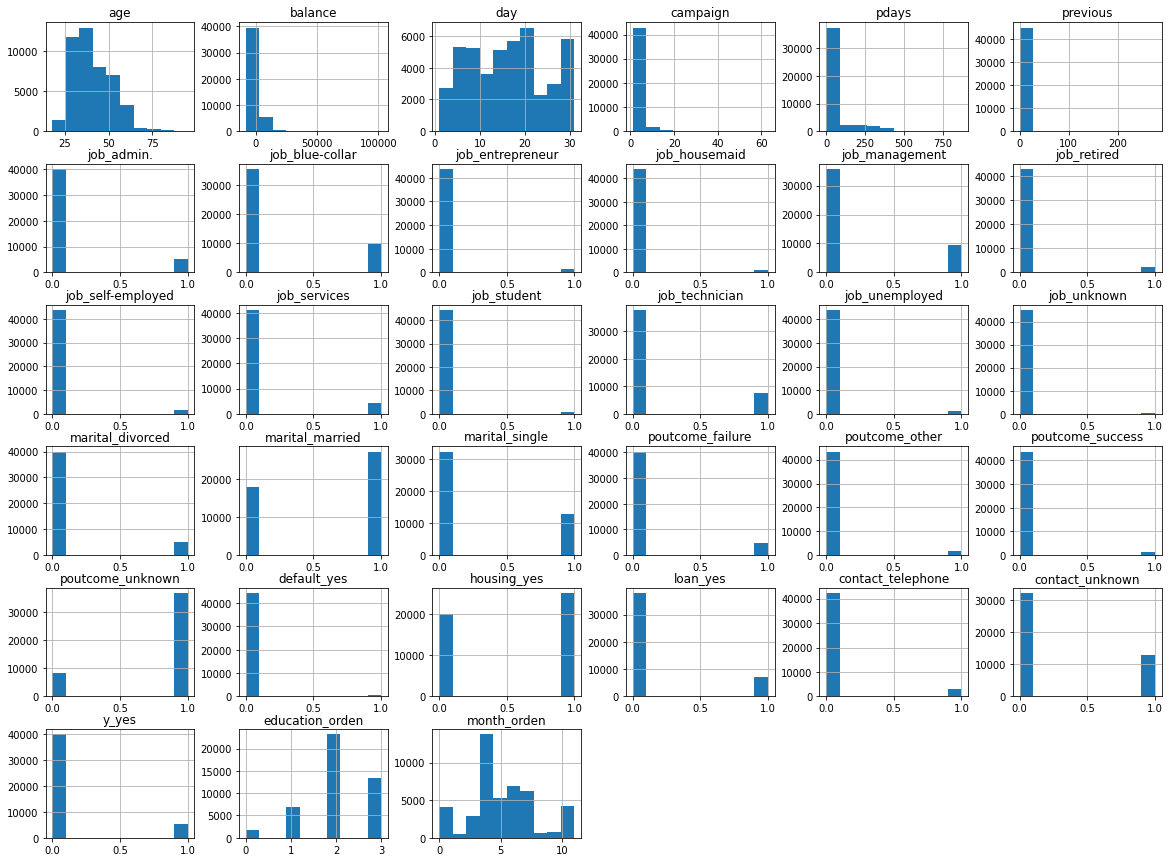

In [42]:
a=df_piv.hist(figsize=(20, 15))

In [43]:
#d = pd.plotting.scatter_matrix(df_piv, c=df_piv.y_yes, cmap='Set1', figsize=(15, 15))

Creamos la variable etiqueta

In [44]:
y = df_piv[['y_yes']].values[:,0]
y.shape

(45211,)

In [45]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [46]:
x=df_piv_no_classes.values
x.shape

(45211, 32)

In [47]:
x

array([[5.800e+01, 2.143e+03, 5.000e+00, ..., 1.000e+00, 3.000e+00,
        4.000e+00],
       [4.400e+01, 2.900e+01, 5.000e+00, ..., 1.000e+00, 2.000e+00,
        4.000e+00],
       [3.300e+01, 2.000e+00, 5.000e+00, ..., 1.000e+00, 2.000e+00,
        4.000e+00],
       ...,
       [7.200e+01, 5.715e+03, 1.700e+01, ..., 0.000e+00, 2.000e+00,
        1.000e+01],
       [5.700e+01, 6.680e+02, 1.700e+01, ..., 0.000e+00, 2.000e+00,
        1.000e+01],
       [3.700e+01, 2.971e+03, 1.700e+01, ..., 0.000e+00, 2.000e+00,
        1.000e+01]])

In [48]:
df_piv_no_classes.head(1)

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,education_orden,month_orden
0,58,2143,5,1,-1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,3.0,4.0


In [49]:
x[0]

array([ 5.800e+01,  2.143e+03,  5.000e+00,  1.000e+00, -1.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
        0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
        3.000e+00,  4.000e+00])

In [50]:
np.mean(x)

46.057756270597864

In [51]:
np.std(x)

588.2205700003472

In [52]:
X_trainPF, X_testPF, y_trainPF, y_testPF = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

Vemos datos estratificados 

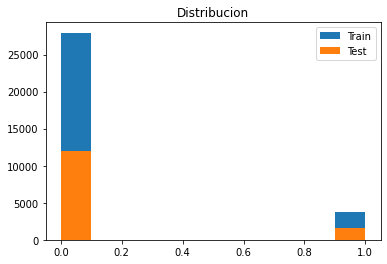

In [53]:
pl.hist(y_trainPF, label="Train")
pl.hist(y_testPF, label="Test")
pl.legend()
pl.title("Distribucion")
pl.show()

In [54]:
mlp_PRO_FLA = MLPClassifier(solver='lbfgs', max_iter=100,random_state=1,hidden_layer_sizes=(2,1))
#mlp_PRO_FLA = MLPClassifier()

In [55]:
mlp_PRO_FLA.fit(X_trainPF, y_trainPF)

MLPClassifier(hidden_layer_sizes=(2, 1), max_iter=100, random_state=1,
              solver='lbfgs')

In [56]:
print('Error en entrenamiento: {}'.format(1-mlp_PRO_FLA.score(X_trainPF, y_trainPF)))
print('Error en prueba: {}'.format(1-mlp_PRO_FLA.score(X_testPF, y_testPF)))

Error en entrenamiento: 0.11726229974405156
Error en prueba: 0.11700088469478032


In [57]:
prediction_testAM = mlp_PRO_FLA.predict(X_testPF)
cnf_matrixAM = confusion_matrix(y_testPF, prediction_testAM)

In [58]:
prediction_testAM[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [59]:
y_testPF[0:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [60]:
class_names = ['no','yes']

In [61]:
list_cm(cnf_matrixAM,class_names)

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   11976    1
Verdadero  yes  1586     1


In [62]:
print('SCORE entrenamiento: {}'.format(mlp_PRO_FLA.score(X_trainPF, y_trainPF)))
print('Error en entrenamiento: {}'.format(1-mlp_PRO_FLA.score(X_trainPF, y_trainPF)))
print('SCORE prueba: {}'.format(mlp_PRO_FLA.score(X_testPF, y_testPF)))
print('Error en prueba: {}'.format(1-mlp_PRO_FLA.score(X_testPF, y_testPF)))
sensibilidad=recall_score(y_testPF,prediction_testAM)
print("Sensibilidad: {}".format(sensibilidad))

SCORE entrenamiento: 0.8827377002559484
Error en entrenamiento: 0.11726229974405156
SCORE prueba: 0.8829991153052197
Error en prueba: 0.11700088469478032


Tratando el desbalanceo

Estrategia: Subsampling en la clase mayoritaria


In [82]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

X_trainPF, X_testPF, y_trainPF, y_testPF = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [64]:
us = NearMiss(n_neighbors=3, version=3)

X_train_res, y_train_res = us.fit_resample(X_trainPF, y_trainPF)
 
print ("Distribucion Original {}".format(Counter(y_trainPF)))
print ("Distribucion despuest del subsampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 27945, 1: 3702})
Distribution after resampling Counter({0: 3702, 1: 3702})


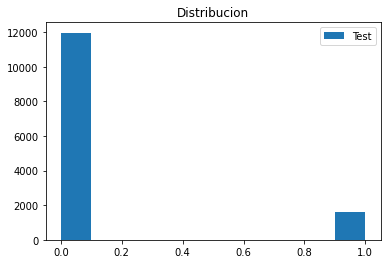

In [65]:
pl.hist(y_testPF, label="Test")
pl.legend()
pl.title("Distribucion")
pl.show()

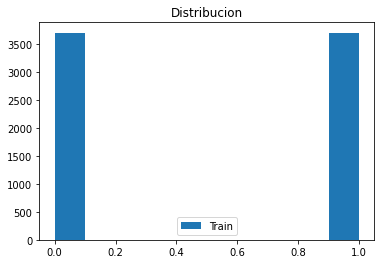

In [66]:

pl.hist(y_train_res, label="Train")
pl.legend()
pl.title("Distribucion")
pl.show()

In [67]:
mlp_PRO_FLA = MLPClassifier(solver='lbfgs', max_iter=200,random_state=1,hidden_layer_sizes=(2,1))
mlp_PRO_FLA.fit(X_train_res, y_train_res)
prediction_testAM = mlp_PRO_FLA.predict(X_testPF)
cnf_matrixAM = confusion_matrix(y_testPF, prediction_testAM)
list_cm(cnf_matrixAM,class_names)
print('SCORE entrenamiento: {}'.format(mlp_PRO_FLA.score(X_train_res, y_train_res)))
print('Error en entrenamiento: {}'.format(1-mlp_PRO_FLA.score(X_train_res, y_train_res)))
print('SCORE prueba: {}'.format(mlp_PRO_FLA.score(X_testPF, y_testPF)))
print('Error en prueba: {}'.format(1-mlp_PRO_FLA.score(X_testPF, y_testPF)))

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   4062     7915
Verdadero  yes  857      730
SCORE entrenamiento: 0.6636952998379254
Error en entrenamiento: 0.3363047001620746
SCORE prueba: 0.35328811560011797
Error en prueba: 0.646711884399882


Sensibillidad del modeo

In [68]:
from sklearn.metrics import recall_score

sensibilidad=recall_score(y_testPF,prediction_testAM)
print(sensibilidad)

0.4599873976055451


In [69]:
us = NearMiss(n_neighbors=3, version=3)

X_res, y_res = us.fit_resample(x, y)
 
print ("Distribucion Original {}".format(Counter(y)))
print ("Distribution despues del subsampling {}".format(Counter(y_res)))

Distribution before resampling Counter({0: 39922, 1: 5289})
Distribution after resampling Counter({0: 5289, 1: 5289})


In [70]:
X_trainPF, X_testPF, y_trainPF, y_testPF = train_test_split(X_res, y_res, test_size=0.3, random_state=1, stratify=y_res)

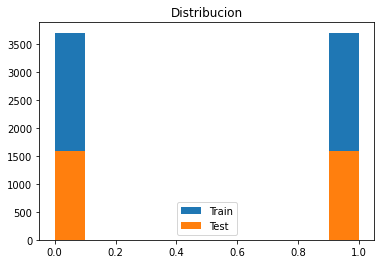

In [71]:
pl.hist(y_trainPF, label="Train")
pl.hist(y_testPF, label="Test")
pl.legend()
pl.title("Distribucion")
pl.show()

In [73]:
mlp_PRO_FLA = MLPClassifier(solver='lbfgs', max_iter=200,random_state=1,hidden_layer_sizes=(2,1))
mlp_PRO_FLA.fit(X_trainPF, y_trainPF)
prediction_testAM = mlp_PRO_FLA.predict(X_testPF)
cnf_matrixAM = confusion_matrix(y_testPF, prediction_testAM)
list_cm(cnf_matrixAM,class_names)
print('SCORE entrenamiento: {}'.format(mlp_PRO_FLA.score(X_trainPF, y_trainPF)))
print('Error en entrenamiento: {}'.format(1-mlp_PRO_FLA.score(X_trainPF, y_trainPF)))
print('SCORE prueba: {}'.format(mlp_PRO_FLA.score(X_testPF, y_testPF)))
print('Error en prueba: {}'.format(1-mlp_PRO_FLA.score(X_testPF, y_testPF)))
sensibilidad=recall_score(y_testPF,prediction_testAM)
print("Sensibilidad: {}".format(sensibilidad))

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   1299     288
Verdadero  yes  800      787
SCORE entrenamiento: 0.6569421934089681
Error en entrenamiento: 0.3430578065910319
SCORE prueba: 0.6572148708254568
Error en prueba: 0.3427851291745432
Sensibilidad: 0.4959042218021424


Estrategia: Oversampling de la clase minoritaria

In [85]:
over_sampling =  RandomOverSampler(random_state=12)
X_train_over, y_train_over = over_sampling.fit_resample(x, y)
 
print ("Distribucion Original {}".format(Counter(y)))
print ("Distribution despues del oversampling {}".format(Counter(y_train_over)))

Distribution before resampling Counter({0: 39922, 1: 5289})
Distribution labels after resampling Counter({0: 39922, 1: 39922})


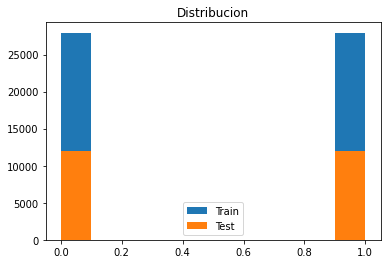

In [90]:
X_trainPF, X_testPF, y_trainPF, y_testPF = train_test_split(X_train_over, y_train_over, test_size=0.3, random_state=1, stratify=y_train_over)
pl.hist(y_trainPF, label="Train")
pl.hist(y_testPF, label="Test")
pl.legend()
pl.title("Distribucion")
pl.show()

Modelo

In [91]:
mlp_PRO_FLA = MLPClassifier(solver='lbfgs', max_iter=200,random_state=1,hidden_layer_sizes=(2,1))
mlp_PRO_FLA.fit(X_trainPF, y_trainPF)
prediction_testAM = mlp_PRO_FLA.predict(X_testPF)
cnf_matrixAM = confusion_matrix(y_testPF, prediction_testAM)
list_cm(cnf_matrixAM,class_names)
print('SCORE entrenamiento: {}'.format(mlp_PRO_FLA.score(X_trainPF, y_trainPF)))
print('Error en entrenamiento: {}'.format(1-mlp_PRO_FLA.score(X_trainPF, y_trainPF)))
print('SCORE prueba: {}'.format(mlp_PRO_FLA.score(X_testPF, y_testPF)))
print('Error en prueba: {}'.format(1-mlp_PRO_FLA.score(X_testPF, y_testPF)))
sensibilidad=recall_score(y_testPF,prediction_testAM)
print("Sensibilidad: {}".format(sensibilidad))

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   2464     9513
Verdadero  yes  1143     10834
SCORE entrenamiento: 0.5578636607622115
Error en entrenamiento: 0.4421363392377885
SCORE prueba: 0.5551473657844201
Error en prueba: 0.44485263421557986
Sensibilidad: 0.9045670869165902


Estrategia: Combinamos resampling con Smote-Tomek

In [92]:
smote_tomek = SMOTETomek(random_state=12)
X_train_smt, y_train_smt = smote_tomek.fit_resample(x,y)
 
print ("Distribucion Original {}".format(Counter(y)))
print ("Distribution despues smote-Tomek {}".format(Counter(y_train_smt)))

Distribucion Original Counter({0: 39922, 1: 5289})
Distribution despues smote-Tomek Counter({0: 38900, 1: 38900})


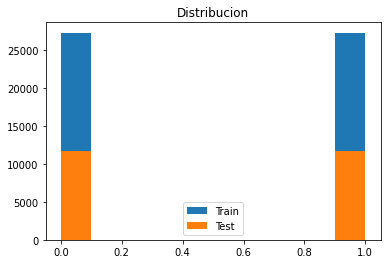

In [93]:
X_trainPF, X_testPF, y_trainPF, y_testPF = train_test_split(X_train_smt, y_train_smt, test_size=0.3, random_state=1, stratify=y_train_smt)
pl.hist(y_trainPF, label="Train")
pl.hist(y_testPF, label="Test")
pl.legend()
pl.title("Distribucion")
pl.show()

Modelo

In [94]:
mlp_PRO_FLA = MLPClassifier(solver='lbfgs', max_iter=200,random_state=1,hidden_layer_sizes=(2,1))
mlp_PRO_FLA.fit(X_trainPF, y_trainPF)
prediction_testAM = mlp_PRO_FLA.predict(X_testPF)
cnf_matrixAM = confusion_matrix(y_testPF, prediction_testAM)
list_cm(cnf_matrixAM,class_names)
print('SCORE entrenamiento: {}'.format(mlp_PRO_FLA.score(X_trainPF, y_trainPF)))
print('Error en entrenamiento: {}'.format(1-mlp_PRO_FLA.score(X_trainPF, y_trainPF)))
print('SCORE prueba: {}'.format(mlp_PRO_FLA.score(X_testPF, y_testPF)))
print('Error en prueba: {}'.format(1-mlp_PRO_FLA.score(X_testPF, y_testPF)))
sensibilidad=recall_score(y_testPF,prediction_testAM)
print("Sensibilidad: {}".format(sensibilidad))

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   7703     3967
Verdadero  yes  5112     6558
SCORE entrenamiento: 0.6128167462357694
Error en entrenamiento: 0.3871832537642306
SCORE prueba: 0.6110111396743787
Error en prueba: 0.3889888603256213
Sensibilidad: 0.5619537275064267
